# Gdal raster operations

### GDAL Raster 
### Abdillahi Osman Omar December, 2023

## NOTE BEFORE STARTING THE EXERCISES

The goal of this practical session is to learn using the gdal package and handle
raster data. These exercises come in two parts: the first part in which you will
get in touch with the gdal Python library to work with raster datasets and the
second part were you should use the gdal executables and scripts. 

Naturally, these exercises cannot be used in isolation as they relate to you have previously learned.
Our intention is that you spend most of your time with the first exercises, and
use this session a starting point in the use of gdal in Python. Thus, we keep
following an incremental approach of the exercises, by gradually increasing its
complexity.

In this section, you will learn the basic handling of raster data with gdal. It is
not possible to cover all the functionalities and functions available in this package,
thus, we encourage you to keep checking the gdal documentation in the website
to find out how to properly use them.

#### Check these resources for GDAL: 
##### Explore by your own step by step !
https://gdal.org/gdal.pdf ---- GDAL Documentation 

https://gdal.org/drivers/raster/index.html 

https://gdal.org/tutorials/index.html ---- GDALTutorials

https://gdal.org/programs/index.html ---- GDAL Programs

In [1]:
import numpy as np
import os

path_to_2014_tiff =r'/home/user/Handouts/exercise_data_raster/2014.tif'
if os.path.exists(path_to_2014_tiff):
    print("File is avaiable")
else:
    print("File is not available")

File is not available


In [2]:
import numpy as np
import os

path_to_2014_tiff =r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014.tif"
if os.path.exists(path_to_2014_tiff):
    print("File is avaiable")
else:
    print("File is not available")

File is avaiable


## 9.1

In [6]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [7]:
""" Open the file 2014.tif that represents the daily maximum temperature of 2014, 
and obtain the following pieces of information about the file:
1.1 Driver name
1.2 Raster size
1.3 Geo transform information:
1.3.1 Top left coordinates
1.3.2 Pixel size
1.3.3 Rotation
1.4 Number of bands
"""

' Open the file 2014.tif that represents the daily maximum temperature of\n2014, and obtain the following pieces of information about the file:\n1.1 Driver name\n1.2 Raster size\n1.3 Geo transform information:\n1.3.1 Top left coordinates\n1.3.2 Pixel size\n1.3.3 Rotation\n1.4 Number of bands\n'

In [3]:
from osgeo import gdal

dataDirectory = r'C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014.tif'
print(dataDirectory)
print()

# Open dataset without changing the working directory
raster = gdal.Open(dataDirectory)

# Getting driver name
driver = raster.GetDriver().LongName
print("Driver name:", driver)
print()

# Getting raster size
x = raster.RasterXSize
y = raster.RasterYSize
print("x size:", x, "y size:", y)
print()

# Getting geotransform info
g = raster.GetGeoTransform()
if g is not None:
    print("Top-left x:", g[0], "Top-left y:", g[3])
    print("Pixel-size w-e:", g[1], "Pixel-size n-s:", g[5])
    print("Rotation x:", g[2], "Rotation y:", g[4])
    print()

# Getting bands
count = raster.RasterCount
print("There are " + str(count) + " bands")
print()

C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014.tif

Driver name: GeoTIFF

x size: 300 y size: 350

Top-left x: 0.0 Top-left y: 640000.0
Pixel-size w-e: 1000.0 Pixel-size n-s: -1000.0
Rotation x: 0.0 Rotation y: 0.0

There are 365 bands



C:\Users\Zako3\anaconda3\envs\python_foundation\Lib\site-packages\osgeo\gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


## 9.2

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
"""
Within the dataset 2014.tif, access the first day of measurements (i.e., the
first band) and obtain the statistics of those measurements. Also to better
understand this data, determine the no data value (if defined) and check the
number of overviews.
"""

In [4]:
from osgeo import gdal
import os

dataDirectory = r'C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014.tif'
print(dataDirectory)
print()

# open dataset

raster = gdal.Open(dataDirectory)
band = raster.GetRasterBand(1)
min_val = band.GetMinimum()
max_val = band.GetMaximum()
#print("min value:", min_val, "max value", max_val)

stats = band.GetStatistics(False, True)
print('min=%.2f max=%.2f, mean=%.2f std=%.2f' % (stats[0], stats[1], stats[2], stats[3]))
print()
print("no data value:", band.GetNoDataValue())
print()
print("number of overviews:", band.GetOverviewCount())
print()

data_type = band.DataType
print(data_type)


C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014.tif

min=7.73 max=10.50, mean=9.19 std=0.61

no data value: -9999.0

number of overviews: 0

6


### NOTE

When you get a value of 6, it means the data type of the raster band is Float32, which is a 32-bit floating-point data type.

A return value of 6 from band.DataType in GDAL corresponds to a 16-bit unsigned integer data type. The numerical values returned by band.DataType represent various raster data types, and the mapping is defined in the GDAL documentation.

In GDAL, the most common data types and their corresponding numerical values are:

1: Byte (8-bit unsigned integer)

2: UInt16 (16-bit unsigned integer)

3: Int16 (16-bit signed integer)

4: UInt32 (32-bit unsigned integer)

5: Int32 (32-bit signed integer)

6: Float32 (32-bit floating-point)

7: Float64 (64-bit floating-point)

So, when you get a value of 6, it means the data type of the raster band is Float32, which is a 32-bit floating-point data type.



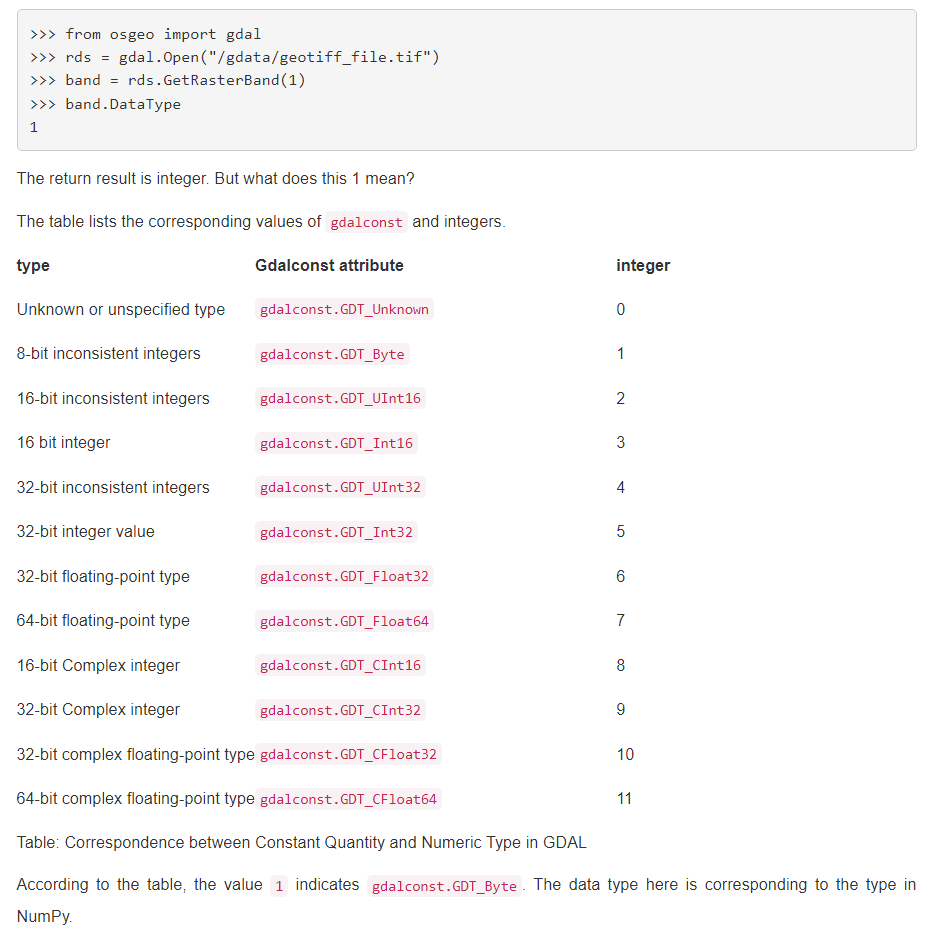

## 9.3

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [32]:
"""
Within the dataset 2014.tif, access the first day of measurements again,
and determine the temperature for position (x; y) = (200, 137).
"""

'\nWithin the dataset 2014.tif, access the first day of measurements again,\nand determine the temperature for position (x; y) = (200, 137).\n'

In [5]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os

dataDirectory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"

# change to the data directory
os.chdir(dataDirectory)

# open dataset

raster = gdal.Open('2014.tif')
band = raster.GetRasterBand(1)
xoff = 200
yoff = 137

# Use 1-1 to extract a single pixel,
# otherwise extract multiple pixels
win_xsize = 1
win_ysize = 1

## Convert to NumPy
px = gdarr.BandReadAsArray(band, xoff, yoff, win_xsize, win_ysize) # Convert to NumPy
# gdarr.BandReadAsArray(band, xoff, yoff, win_xsize, win_ysize): 
# Reads pixel values from the specified window in the raster band.
# 
print('Pixel value:', px[0, 0])


Pixel value: 8.982155


## 9.4

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
"""
With the same dataset and that first day, extract a subset for the Amsterdam area, 
and save it as a raster file named 2014_amsterdam.tif using the GTiff driver.

Data for the Amsterdam area can be extracted using the function
gdarr.BandReadAsArray(band, xoff, yoff, win_xsize, win_ysize)
with the following parameter values: xoff= 0, yoff=0, win_xsize=200, win_ysize=200. 

Verify whether these values make sense to you.
"""

In [6]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os

dataDirectory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"

# change to the data directory
os.chdir(dataDirectory)

# open dataset

raster = gdal.Open('2014.tif')
band = raster.GetRasterBand(1)
xoff = 200
yoff = 200

px = gdarr.BandReadAsArray(band, xoff, yoff, win_xsize, win_ysize)
print(px[0,0])

# Saving the file 
driver = gdal.GetDriverByName('GTiff')


outraster = driver.Create('2014_amsterdam.tif', 
                          px.shape[1], px.shape[0], 1, 
                          gdal.GDT_Float32) # 

# Define the new raster dataset projection and geotransform
prj = raster.GetProjection()
outraster.SetProjection(prj)
gt = raster.GetGeoTransform()
outraster.SetGeoTransform(gt)

# Create a band
outband = outraster.GetRasterBand(1)

# Write the array to the band
outband.WriteArray(px)

# Set a pixel nodata value
outband.SetNoDataValue(band.GetNoDataValue())

# Flush the cache and clean memory
if outband is not None:
    outband.FlushCache()
    outband = None

if outraster is not None:
    outraster = None

if band is not None:
    band = None

if raster is not None:
    raster = None

print("File closed!")


8.975358
File closed!


## 9.5

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()


"""
Transform dataset 2014.tif into a numpy array, then next determine temperature
values for the following day/location combinations.
You may use function gdarr.DatasetReadAsArray(dataset, xoff, yoff,
win_xsize, win_ysize) for the transformation. 

Do not forget that in numpy X represents columns and Y represents rows.

"""

In [7]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os

dataDirectory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"

# change to the data directory
os.chdir(dataDirectory)

# open dataset

raster = gdal.Open('2014.tif')
band = raster.GetRasterBand(1)
xoff = 0
yoff = 0

win_xsize = 200
win_ysize = 200

# Read all bands as a 3D array
px = gdarr.DatasetReadAsArray(raster, xoff, yoff, win_xsize, win_ysize)
print('Shape:', px.shape)

# The order is px[Days, Y, X]
print('Line 1 Temperature:', px[0, 0, 0])
print('Line 2 Temperature:', px[30, 100, 100])
print('Line 3 Temperature:', px[58, 150, 78])
print('Line 4 Temperature:', px[89, 180, 186])
print('Line 5 Temperature:', px[119, 160, 20])
print('Line 6 Temperature:', px[150, 100, 100])
print('Line 7 Temperature:', px[364, 150, 78])



Shape: (365, 200, 200)
Line 1 Temperature: -9999.0
Line 2 Temperature: 5.843884
Line 3 Temperature: -9999.0
Line 4 Temperature: 19.864407
Line 5 Temperature: -9999.0
Line 6 Temperature: 16.898111
Line 7 Temperature: -9999.0


## 9.6

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
"""
With the same dataset and the first day measurements, extract a subset of Ex 9.6
Enschede area and save it into a raster file named 2014_enschede.tif using
the GTiff driver.
The Enschede area can be extracted using the function using parameters:
xoff= 100, yoff=40, win_xsize=200, win_ysize=200. 

Hint: you will need a new geotransform using pixel offset calculations. 
Check the slides how to do this.

"""

In [43]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os

dataDirectory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"

# change to the data directory
os.chdir(dataDirectory)

# open dataset

raster = gdal.Open('2014.tif')
band = raster.GetRasterBand(1)
xoff = 100
yoff = 40
win_xsize = 200
win_ysize = 200

# Read a single band as a two-dimensional array
px = gdarr.BandReadAsArray(band, xoff, yoff, win_xsize, win_ysize)
driver = gdal.GetDriverByName('GTiff')
outraster = driver.Create('2014_enschede.tif', px.shape[1], px.shape[0], 1, gdal.GDT_Float32)

# Define the new raster dataset projection and geotransform
prj = raster.GetProjection()
outraster.SetProjection(prj)
gt = raster.GetGeoTransform()

# Getting new top-left value
newTL = gdal.ApplyGeoTransform(gt, 100, 150)  # 100 and 150 are the assumed original pixel values. 
outraster.SetGeoTransform([newTL[0], 1000, 0, newTL[1], 0, -1000])
# Comment on here 
# Sometimes we need to compute a new geotransform to save a new
#raster image. For such, we need to transform rows/columns into
# coordinates, and vice versa.

# Create a band
outband = outraster.GetRasterBand(1)

# Write the array to the band
outband.WriteArray(px)

# Set a pixel nodata value
outband.SetNoDataValue(band.GetNoDataValue())

# Flush the cache and clean memory
if outband is not None:
    outband.FlushCache()
    outband = None

if outraster is not None:
    outraster = None

if band is not None:
    band = None

if raster is not None:
    raster = None

print("File closed!")

File closed!


### NOTE 

The pair **(gt[0], gt[3])** provides the coordinates of the top-left corner of the raster in the original coordinate system. 

The other elements **(gt[1], gt[2], gt[4], gt[5])** define the pixel resolution and potential rotation.

## 9.7

### The use of .Translate() and .Warp() methods

### References for .Translate() and .Warp() methods


https://gdal.org/programs/gdal_translate.html

Converts raster data between different formats.

https://gdal.org/programs/gdalwarp.html

Image reprojection and warping utility

In [ ]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
"""
In this block of exercises, you learn how to run the gdal.Translate and
gdal.Warp methods.

You should have a folder called 2014_csv. This folder has 31 csv files, one 
per day, each of which represents the maximum temperature in the month
of January 2014. 

With the method gdal.Translate you should create new raster tif files based on the csv files. 
The coordinate system of the csv files is EPSG code 28992. 
Ensure that you specify the nodata value as -9999.

You will need to create a loop using the os.listdir(directory) function.
For example, you can use the following code to loop over files in a directory:


"""

In [38]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os

directory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014_csv"

# change to the data directory
os.chdir(directory)

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filename_simple = filename.split('.')[0]
        new_dataset = gdal.Translate(filename_simple + '.tif',
                                     filename, format="GTiff", noData='-9999', outputSRS='EPSG:28992')
    else:
        continue

print('Finished')


### Both 2014_CSV and 2014.tiff are saved in the same folder 
### Follow more details in the directory

Finished


## 9.8

In [58]:
#"""Enter your answer here."""
# YOUR CODE HERE
#raise NotImplementedError()

"""Try to work out Exercise 4 and 6 above with gdal.Translate()."""

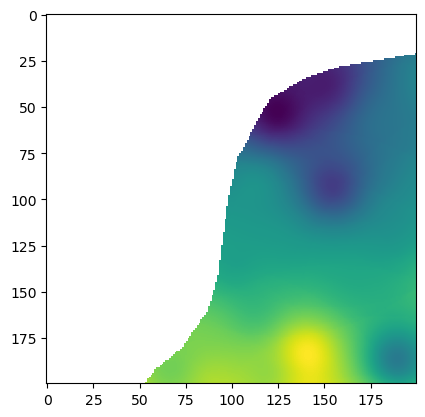

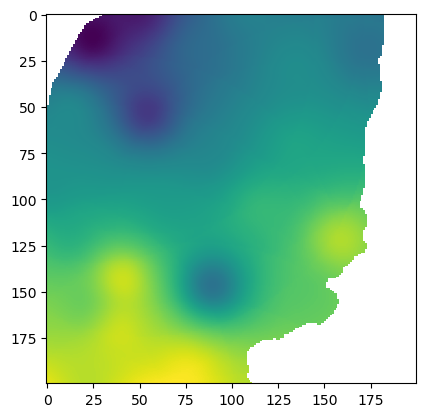

Finished


In [9]:
from osgeo import gdal
from osgeo import gdal_array as gdarr
import os
import matplotlib . pyplot as plt

dataDirectory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster"

# change to the data directory
os.chdir(dataDirectory)

# open dataset

raster = gdal.Open('2014.tif')

# Exercise 4
AmsDataset = gdal.Translate("2014_amsterdam2.tif", raster, format="GTiff", srcWin=[0, 0, 200, 200])

# Show the raster image to confirm
newBand = AmsDataset.GetRasterBand(1)
px = gdarr.BandReadAsArray(newBand, 0, 0, AmsDataset.RasterXSize, AmsDataset.RasterYSize)
px[px == -9999] = None
plt.imshow(px)
plt.show()
print()
print()
print()

# Exercise 6
EnsDataset = gdal.Translate("2014_enschede2.tif", 
                            raster, 
                            format="GTiff", 
                            srcWin=[100, 40, 200, 200])

# Show the raster image to confirm
newBand = EnsDataset.GetRasterBand(1)
px = gdarr.BandReadAsArray(newBand, 0, 0, EnsDataset.RasterXSize, EnsDataset.RasterYSize)
px[px == -9999] = None
plt.imshow(px)
plt.show()

plt.tight_layout
print('Finished')

## 9.9

In [ ]:
"""Enter your answer here."""
### BEGIN SOLUTION

### END SOLUTION

In [ ]:
"""

In Exercise 7, we should have created 31 tif files, one per day. These files
make use of the spatial reference system known as EPSG code 28992. 

Now, reproject these files into new tif files, that make use of spatial reference system
known as EPSG code 4326 (WGS84), through the use of gdal.Warp().

Please check the presentation slides for more information on how to do this.
And do also check Warp options for the list of available gdal.Warp options.

"""

In [42]:
from osgeo import gdal
import os

directory = r"C:\Users\Zako3\Downloads\Handouts\exercise_data_raster\2014_csv"

# change to the data directory
os.chdir(directory)

for filename in os.listdir(directory):
    if filename.endswith(".tif"):
        raster = gdal.Open(filename)
        new_dataset = gdal.Warp("", raster, format="Mem", dstSRS='EPSG:4326')
    else:
        continue

print('Finished')

Finished
